In [3]:
from skimage.io import imread
from skimage.filters import threshold_otsu
import matplotlib.pyplot as plt
import imutils


In [15]:
car_image = imread("./vehicle.png", as_gray=True)
# car_image = imutils.rotate(car_image, 270)
gray_car_image = car_image * 255

# All pixels intensities that less or equal of this value assumed as foreground
threshold_value = threshold_otsu(gray_car_image) 

binary_car_image = gray_car_image > threshold_value # Foreground = False, Background = True

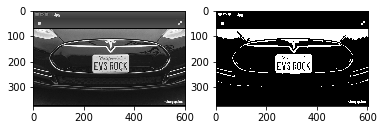

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(gray_car_image, cmap="gray")
ax2.imshow(binary_car_image, cmap="gray")
plt.show()

In [21]:
# CCA (finding connected regions) of binary image
from skimage import measure
from skimage.measure import regionprops
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [22]:
label_image = measure.label(binary_car_image) # False 0, True 1

In [31]:
# getting the maximum width, height and minimum width and height that a license plate can be
# Assumption: 
# width of license plate is 15-40 % of image shape
# height of license plate is 8-20 % of image shape

plate_dimensions = (0.08*label_image.shape[0], 0.13*label_image.shape[0], 0.3*label_image.shape[1], 0.35*label_image.shape[1])
plate_dimensions2 = (0.08*label_image.shape[0], 0.2*label_image.shape[0], 0.15*label_image.shape[1], 0.4*label_image.shape[1])
min_height, max_height, min_width, max_width = plate_dimensions

min_height, max_height, min_width, max_width

(30.080000000000002, 48.88, 180.9, 211.04999999999998)

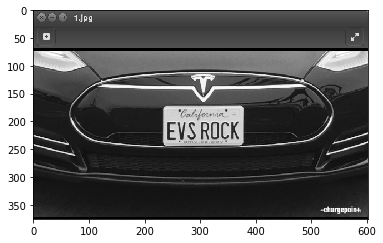

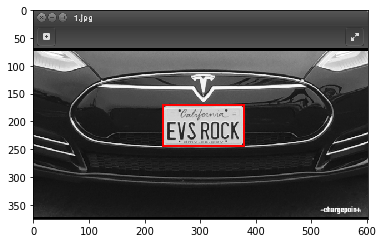

In [32]:
plate_objects_cordinates = []
plate_like_objects = []
fig, (ax1) = plt.subplots(1)
ax1.imshow(gray_car_image, cmap="gray")
flag =0

# "regionprops" creates a list of properties of all the labelled regions
for region in regionprops(label_image):
    # print(region)
    if region.area < 50:
        #if the region is so small then it's likely not a license plate
        continue
        
    min_row, min_col, max_row, max_col = region.bbox
    region_height = max_row - min_row
    region_width = max_col - min_col
    
    if region_height >= min_height and region_height <= max_height and region_width >= min_width and region_width <= max_width and region_width > region_height:
        flag = 1
        plate_like_objects.append(binary_car_image[min_row:max_row, min_col:max_col])
        plate_objects_cordinates.append((min_row, min_col, max_row, max_col))
        rectBorder = patches.Rectangle((min_col, min_row), max_col - min_col, max_row - min_row, edgecolor="green",
                                       linewidth=4, fill=False)
        ax1.add_patch(rectBorder)
        

if(flag == 1):
    plt.show()
    
if(flag==0):
    min_height, max_height, min_width, max_width = plate_dimensions2
    plate_objects_cordinates = []
    plate_like_objects = []

    fig, (ax1) = plt.subplots(1)
    ax1.imshow(gray_car_image, cmap="gray")

    for region in regionprops(label_image):
        if region.area < 50:
            #if the region is so small then it's likely not a license plate
            continue
            
        min_row, min_col, max_row, max_col = region.bbox
        
        region_height = max_row - min_row
        region_width = max_col - min_col
        
        if region_height >= min_height and region_height <= max_height and region_width >= min_width and region_width <= max_width and region_width > region_height:
            
            plate_like_objects.append(binary_car_image[min_row:max_row, min_col:max_col])
            plate_objects_cordinates.append((min_row, min_col, max_row, max_col))
            rectBorder = patches.Rectangle((min_col, min_row), max_col - min_col, max_row - min_row, edgecolor="red",
                                           linewidth=2, fill=False)
            ax1.add_patch(rectBorder)
            
plt.show()